<a href="https://colab.research.google.com/github/AtharvPandit07/Deep-Learning/blob/main/Handwritten_Digit_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN:-HandWritten Digi Classification Project


In [24]:
from warnings import  filterwarnings
filterwarnings('ignore')

Load MINST Dataset

In [34]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [35]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [36]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

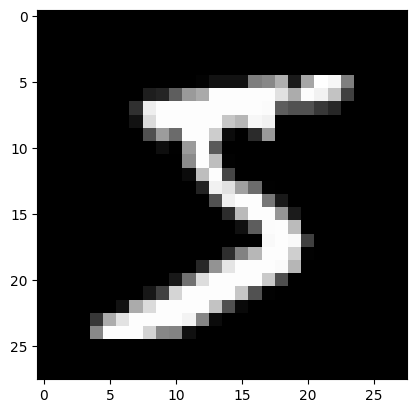

In [37]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray')

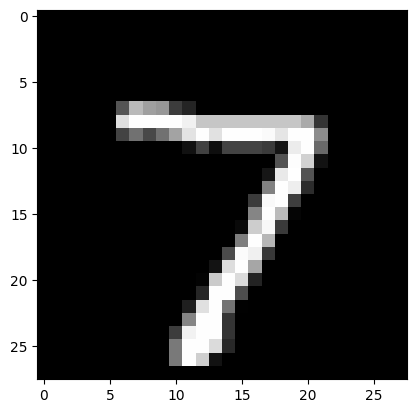

In [38]:
plt.imshow(x_test[0],cmap='gray')

### Display first 9 images from train data

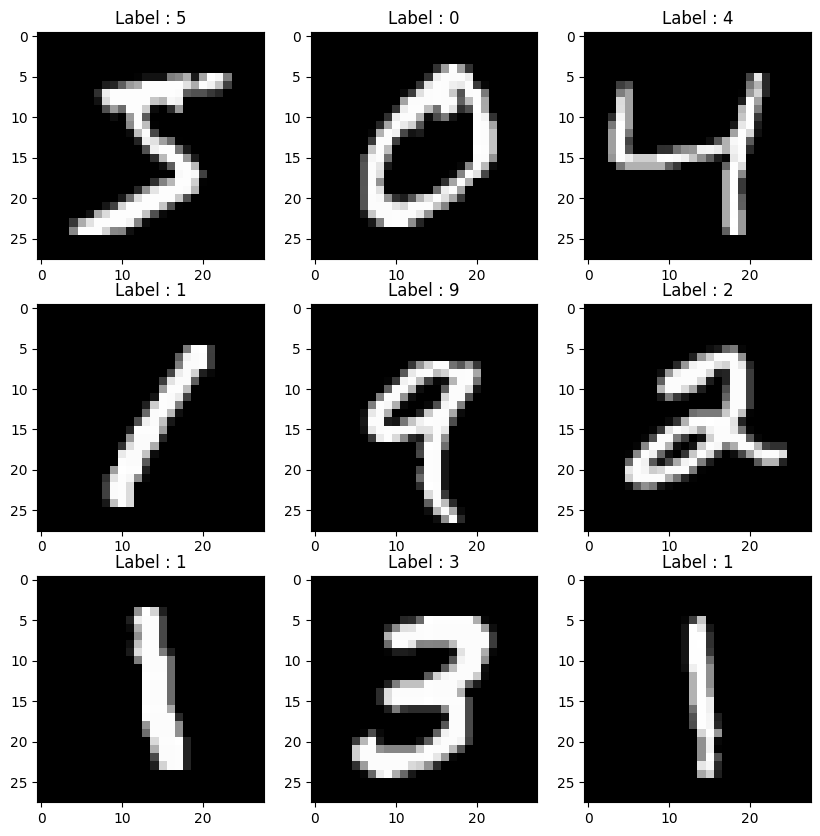

In [40]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label : {y_train[i]}")

In [41]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

###This is multiclass classification problem

### Pre process image data

### Pixel value -0-255

In [42]:
x_train_scl =x_train.astype('float32')/255
x_test_scl =x_test.astype('float32')/255

In [44]:
x_train_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### One hot encode the Y feature

In [45]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [46]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [47]:
y_train_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [48]:
y_test_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
x_train.shape

(60000, 28, 28)

### Build The Neural Network
Simple covnet arhitecture

In [51]:
from keras.models import Sequential
from keras.layers import Input, Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [53]:
model = Sequential()

# Add  Input Layer
model.add(Input(shape=(28,28,1)))

# Add  Convolution  Layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))

# add Max pooling 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Add  Convolution  Layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

# add Max pooling 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Flatten Layer
model.add(Flatten())

# Add Dropout Layer
model.add(Dropout(0.5))

# Add Output Layer
model.add(Dense(10,activation='softmax'))


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [55]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
hist = model.fit(x_train_scl,y_train_cat,epochs=15,validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 13s 4ms/step - loss: 0.2292 - accuracy: 0.9286 - val_loss: 0.0583 - val_accuracy: 0.9842
Epoch 2/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0830 - accuracy: 0.9737 - val_loss: 0.0443 - val_accuracy: 0.9882
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0656 - accuracy: 0.9797 - val_loss: 0.0368 - val_accuracy: 0.9898
Epoch 4/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0552 - accuracy: 0.9822 - val_loss: 0.0337 - val_accuracy: 0.9907
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0298 - val_accuracy: 0.9932
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0464 - accuracy: 0.9847 - val_loss: 0.0306 - val_accuracy: 0.9925
Epoch 7/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0286 - val_accuracy

Plot the learning Curve

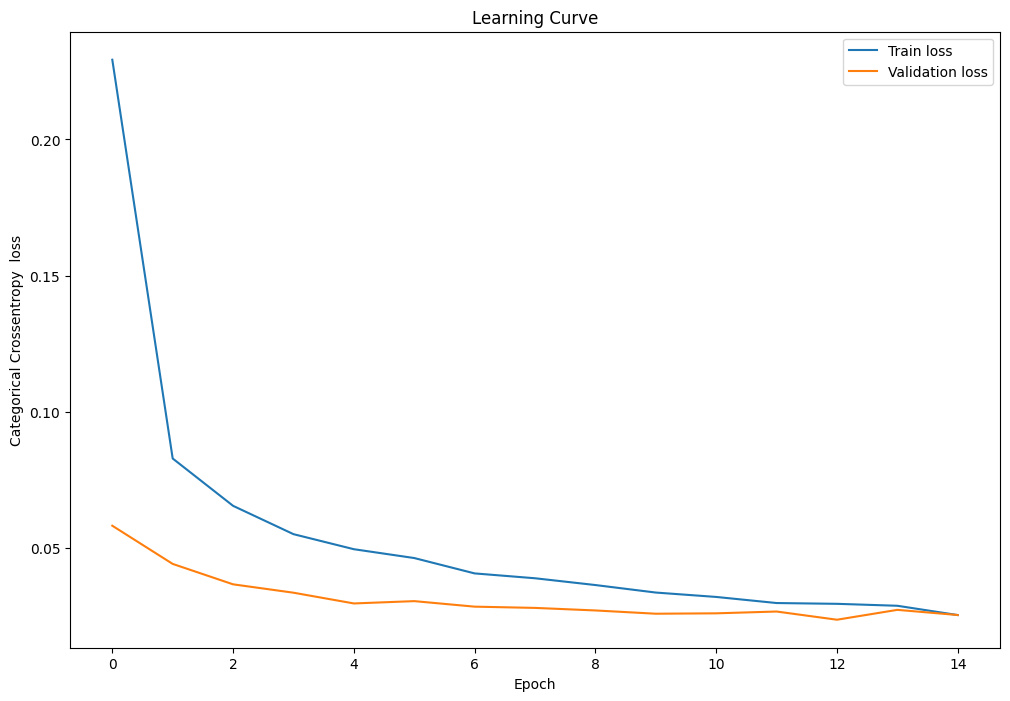

In [59]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'],label='Train loss')
plt.plot(hist.history['val_loss'],label='Validation loss')
plt.title('Learning Curve')
plt.ylabel('Categorical Crossentropy  loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate the model in train test

In [62]:
model.evaluate(x_train_scl,y_train_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0096 - accuracy: 0.9971


[0.009567738510668278, 0.9971166849136353]

In [63]:
model.evaluate(x_test_scl,y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0217 - accuracy: 0.9929


[0.02168409898877144, 0.992900013923645]

## Predict Result for train and test

In [64]:
yprob_train = model.predict(x_train_scl)
yprob_test = model.predict(x_test_scl)

313/313 [==============================] - 1s 2ms/step


In [65]:
yprob_train[0:5]

array([[1.0633704e-12, 4.3450356e-13, 5.8833960e-10, 5.3075806e-04,
        2.0460072e-14, 9.9946862e-01, 1.1508372e-12, 9.5148636e-09,
        3.3187529e-08, 6.0906336e-07],
       [9.9999976e-01, 7.1978312e-18, 2.2909141e-07, 1.3106660e-13,
        2.6300823e-13, 2.4681713e-13, 1.3123051e-08, 1.5823456e-14,
        2.5944447e-08, 5.9731722e-09],
       [4.4810335e-16, 4.3679993e-08, 1.7692959e-09, 1.3915934e-11,
        9.9999917e-01, 4.4438498e-11, 3.1777513e-13, 8.1786652e-08,
        7.4166202e-09, 7.6382986e-07],
       [9.0596401e-08, 9.9994934e-01, 4.2025099e-06, 1.9383547e-11,
        1.1958395e-05, 1.0513325e-09, 1.1218942e-06, 1.2790477e-05,
        2.0427531e-05, 5.5354068e-08],
       [8.9369579e-12, 9.8553986e-12, 3.4208408e-10, 8.2647766e-10,
        9.8247619e-06, 5.0802543e-11, 1.4668075e-14, 6.1799042e-08,
        3.9064347e-05, 9.9995100e-01]], dtype=float32)

In [66]:

yprob_test[0:5]

array([[2.4698165e-11, 4.3530622e-12, 4.4134680e-07, 1.8148999e-08,
        3.9381374e-15, 3.9264581e-12, 9.4521277e-19, 9.9999940e-01,
        1.5448738e-10, 7.2785184e-08],
       [3.2419706e-07, 5.9315070e-08, 9.9999940e-01, 1.4876531e-10,
        1.4684708e-11, 3.8673038e-15, 2.7843251e-07, 1.2220327e-14,
        3.4079129e-08, 1.3980650e-13],
       [5.8456912e-08, 9.9984169e-01, 2.2894656e-06, 9.4338475e-09,
        1.2897086e-04, 7.1359601e-08, 1.0467172e-06, 6.0867424e-06,
        1.9676936e-05, 8.2137213e-08],
       [9.9976701e-01, 3.3572802e-16, 3.5188251e-07, 7.4815221e-10,
        3.5176922e-10, 7.3787994e-08, 2.1413267e-04, 4.8069461e-12,
        1.6295860e-05, 2.1715985e-06],
       [8.2178667e-11, 9.1604654e-13, 1.9009610e-11, 4.0418539e-13,
        9.9999678e-01, 3.2339997e-12, 1.0848743e-10, 5.9763479e-12,
        4.2426107e-09, 3.2447911e-06]], dtype=float32)

In [67]:

import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [68]:

ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [70]:
y_train[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [71]:

ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [72]:

y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

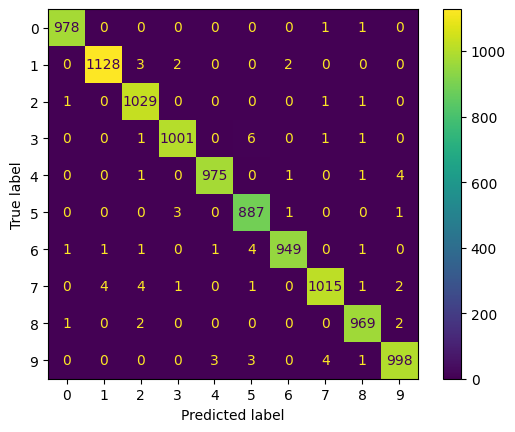

In [74]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred_test)

In [77]:

from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [78]:
model.save('digit_model.keras')

### Load above model

In [79]:
from keras.models import load_model
nn= load_model('/content/digit_model.keras')

In [80]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [81]:
# Loading the image

import cv2
img = cv2.imread('/content/example_img.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [83]:
img_scl = img.astype('float32')/255

In [84]:

probs = model.predict(np.array([img_scl]))

1/1 [==============================] - 0s 184ms/step


In [85]:
probs

array([[5.9348260e-22, 4.4536699e-22, 1.2128567e-13, 9.9999952e-01,
        2.1590699e-19, 5.0369465e-07, 8.1107786e-20, 5.6823033e-17,
        4.8242107e-13, 5.2771183e-13]], dtype=float32)

In [86]:

pred = np.argmax(probs)
pred

3

In [91]:


prob = np.max(probs)
prob

0.9999995

In [92]:
def predict_number(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.show()
  img_scl = img.astype('float32')/255
  probs = model.predict(np.array([img_scl]))
  pred = np.argmax(probs)
  prob = np.max(probs)
  return pred, prob


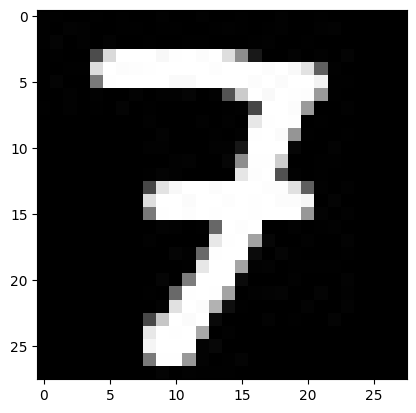

1/1 [==============================] - 0s 17ms/step


(7, 0.9996911)

In [93]:
predict_number('/content/example_img2.jpg')

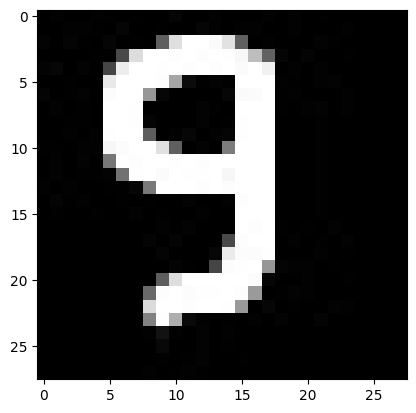

1/1 [==============================] - 0s 17ms/step


(8, 0.7393507)

In [94]:

predict_number('/content/example_img3.jpg')